# Web Services

__Description & purpose__:  This notebook introduces the webservices available through the EODH platform and API endpoints.  

__Author(s)__: Alastair Graham, James Hinton

__Date created__: 2024-12-05

__Date last modified__: 2025-03-13

__Licence__: This notebook is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/).  The code is released using the [BSD-2-Clause](https://www.tldrlegal.com/license/bsd-2-clause-license-freebsd) license.


<span style="font-size:0.75em;">
Copyright (c) , All rights reserved.</span>

<span style="font-size:0.75em;">
Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:</span>

<span style="font-size:0.75em;">
Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution. THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.</span>

# Introduction

OGC API refers to a standardised interface defined by the [Open Geospatial Consortium (OGC)(https://ogcapi.ogc.org/) for accessing and sharing geospatial data over the web. These APIs are built on modern web standards, such as HTTP and RESTful principles, to facilitate seamless, interoperable, and efficient access to spatial data and services. By providing a consistent and easy-to-use framework, OGC APIs allow developers, researchers, and organisations to query, retrieve, and analyze geospatial data without being locked into proprietary systems. This is particularly important as it supports interoperability between different platforms, tools, and organizations, enabling collaboration and innovation. OGC APIs play a critical role in breaking down data silos and ensuring that location-based data can be shared across applications.

## Records
OGC API - Records is designed for discovering and accessing metadata about geospatial resources. It enables users to search, retrieve, and manage metadata records, such as datasets, services, and other resources. The standard supports flexible query capabilities, filtering, and sorting to help users discover relevant geospatial content efficiently. By adhering to web and open standards, OGC API - Records ensures interoperability across platforms, making it easier for organizations to share and access geospatial metadata in a consistent, machine-readable format. This API service is used on the backend of EODH.

## TiTiler
Titiler is a lightweight, fast and customisable dynamic tile server for geospatial data, built on FastAPI and Rasterio. It enables on-the-fly serving of raster tiles, mosaics, and previews from cloud-optimized GeoTIFFs (COGs) and other raster sources. Designed for scalability and efficiency, Titiler supports advanced features like dynamic tiling, custom styling, and integration with modern web mapping applications. It is increasingly used in geospatial analysis, remote sensing, and web-based GIS applications.

### TiTiler data visualisation

in this quick example we use the `Preview` feature to customise some of the parameters we are going to use to dynamically visualise the data.

- `bidx` is the band index we want to preview. In this case, we are previewing the third band.
- `rescale` is the range of values we want to display. In this case, we are rescaling the values between 10 and 255. 
- `colormap_name` is the name of the colormap we want to use. In this case, we are using the `hot` colormap.

All of these parameters can be changed depending on what you want to see in the data.

In [ ]:
# If needed you can install a package in the current AppHub Jupyter environment using pip
# For instance, we will need at least the following libraries
import sys
!{sys.executable} -m pip install --upgrade pyeodh geopandas matplotlib numpy folium xarray requests ipython

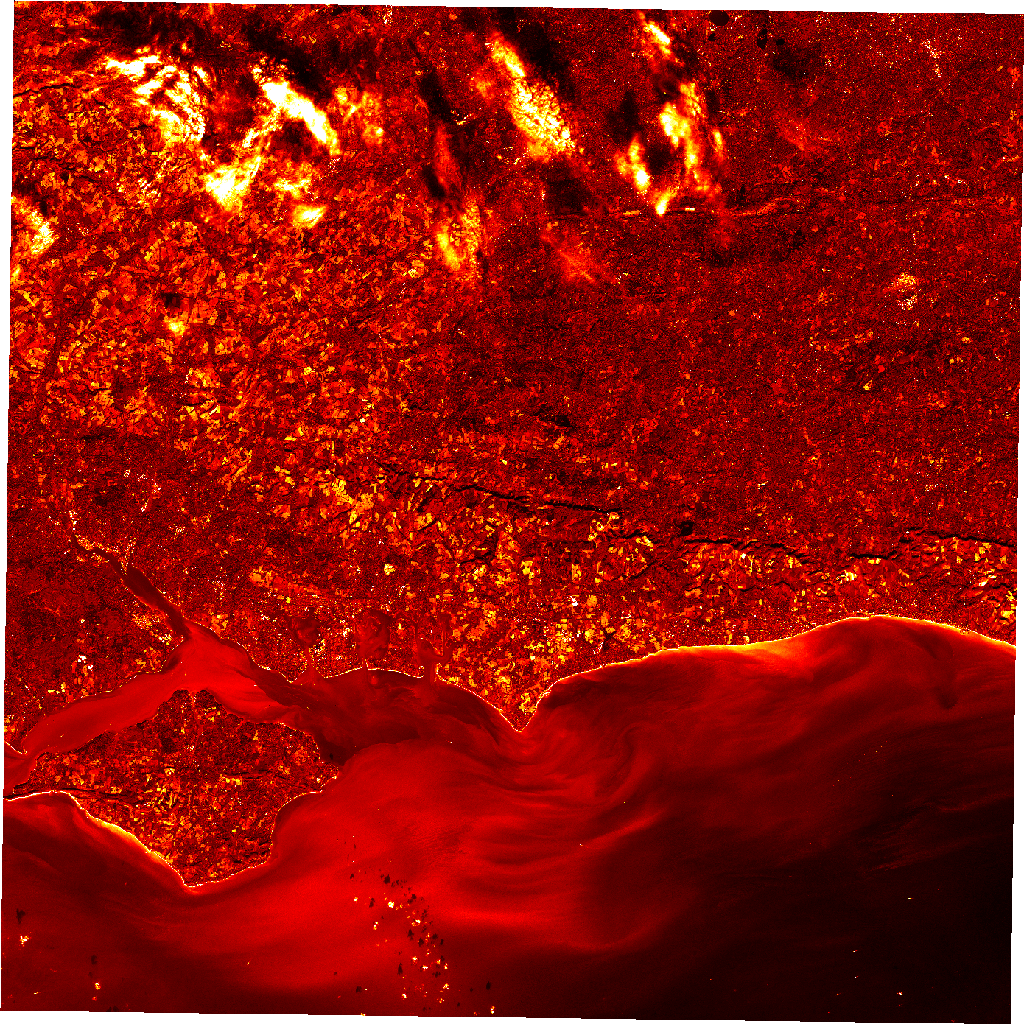

In [ ]:
import requests
import folium
from IPython.display import Image, display

# Set up the parameters 
ENVIRONMENT = 'staging'

# For this example we are directly referencing an item asset
url = "https://dap.ceda.ac.uk/neodc/sentinel_ard/data/sentinel_2/2023/11/17/S2A_20231117_latn509lonw0008_T30UXB_ORB137_20231117131218_utm30n_osgb_vmsk_sharp_rad_srefdem_stdsref.tif"


# Parameterise the TiTiler call
COG_PREVIEW_URL = f'https://{ENVIRONMENT}.eodatahub.org.uk/titiler/core/cog/preview'
COG_PREVIEW_PARAMS = {
    'url': url,
    'bidx': 3,
    'rescale': '10,255',
    'colormap_name': 'hot'
}

# Request the titiler preview
response = requests.get(COG_PREVIEW_URL, params=COG_PREVIEW_PARAMS)

# Display the image
image = Image(response.content)
display(image)

Now that we have previewed the dataset, we can use third party tools to explore the data. To do this, we are going to create an `XYZ` tile endpoint which can be used in any third-party tool that supports XYZ tiles e.g. QGIS, OpenLayers, Leaflet, etc.

The following code cell builds the URL we require based on some of the variables that we have already set. It then prints the URL that we will need to display and visualise the data.

In [5]:
# Generate XYZ For COG
COG_OGC_URL = 'https://' + ENVIRONMENT + '.eodatahub.org.uk/titiler/core/cog/tiles/WebMercatorQuad/{z}/{x}/{y}'
COG_XYZ = COG_OGC_URL + '?' + '&'.join([f'{k}={v}' for k, v in COG_PREVIEW_PARAMS.items()])

print('Cog XYZ: ', COG_XYZ)


Cog XYZ:  https://staging.eodatahub.org.uk/titiler/core/cog/tiles/WebMercatorQuad/{z}/{x}/{y}?url=https://dap.ceda.ac.uk/neodc/sentinel_ard/data/sentinel_2/2023/11/17/S2A_20231117_latn509lonw0008_T30UXB_ORB137_20231117131218_utm30n_osgb_vmsk_sharp_rad_srefdem_stdsref.tif&bidx=3&rescale=10,255&colormap_name=hot


In [12]:
# For the Sentinel dataset
m = folium.Map(location=[50.5, -1.5], zoom_start=10)

# Add the TiTiler layer
folium.raster_layers.TileLayer(
    tiles=COG_XYZ,
    attr="TiTiler",
    name="Sentinel 2 ARD Scene",
    overlay=True
).add_to(m)

# Add a layer control
folium.LayerControl().add_to(m)

# Display the map
m

### Using services in QGIS 

The same TiTiler XYZ URL can be used to display the data in QGIS. To do this we need to open the Data Source Manager and find the XYZ tab on the left hand side of the window. Clicking on "New" will allow a new connection to be added, or you can "Edit" an existing connection to change parameters such as the colourmap. Then click "Add" at the bottom of the window to add the layer to the QGIS display. 

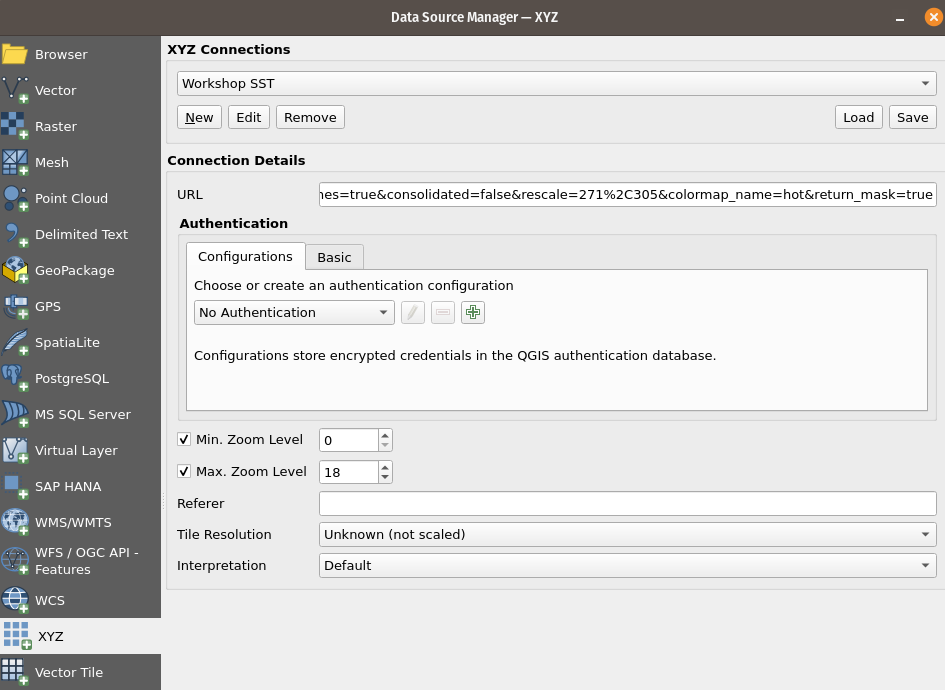

When you click on "New" or "Edit" the following window appears. Enter the previously constructed TiTiler URL into the URL box and that will create a connection to the EODH TiTiler instance.

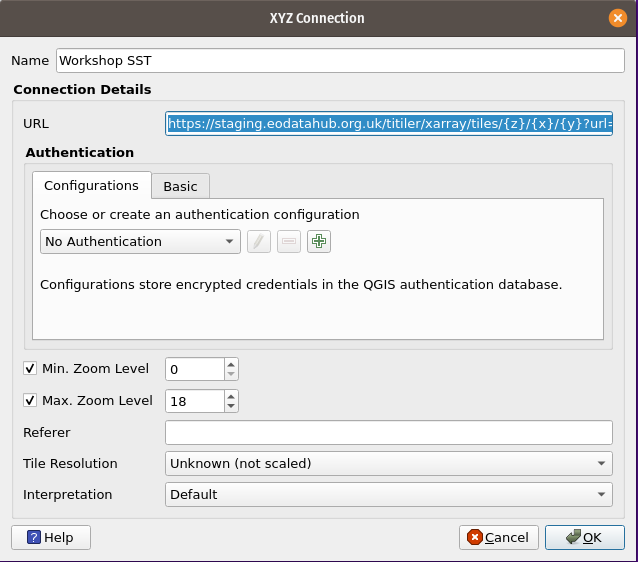

